In [1]:
import os
import gc
import numpy as np

from scipy.optimize import curve_fit
from obspy import UTCDateTime
from pandas import DataFrame, date_range

import matplotlib.pyplot as plt

In [2]:
from functions.load_mlti import __load_mlti
from functions.get_mlti_intervals import __get_mlti_intervals
from functions.mlti_intervals_to_NaN import __mlti_intervals_to_NaN

In [3]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/ontap-ffb-bay200/'
    lamont_path = '/home/andbro/lamont/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/import/ontap-ffb-bay200/'
    lamont_path = '/lamont/'
elif os.uname().nodename in ['lin-ffb-01', 'ambrym', 'hochfelln']:
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/import/ontap-ffb-bay200/'
    lamont_path = '/lamont/'

In [5]:
config = {}

config['camera'] = "03"

config['path_to_data'] = data_path+f"ids/data{config['camera']}/"

config['path_to_outdata'] = data_path+f"ids/data{config['camera']}/"

config['path_to_figures'] = data_path+"ids/figures/"

## experiment 1
# config['date1'] = "2024-05-02"
# config['date2'] = "2024-05-22"

# experiment 2 (after readjustment)
config['date1'] = "2024-05-23"
config['date2'] = "2024-06-22"

# experiment 3 (after readjustment 2024-07-05)
config['date1'] = "2024-07-06"
config['date2'] = "2024-07-28"

# experiment 4 (after readjustment and monobeams at RZ 2024-07-29)
config['date1'] = "2024-07-29"
config['date2'] = UTCDateTime.now().date


In [6]:
mlti = __load_mlti(config['date1'], config['date2'], "Z", archive_path)
mlti_t1, mlti_t2 = __get_mlti_intervals(mlti.time_utc)

In [7]:
def __load_beam_wander_data(tbeg, tend, path_to_data):

    from obspy import UTCDateTime
    from datetime import date
    from pandas import read_pickle, concat, DataFrame, date_range, to_datetime

    t1 = date.fromisoformat(str(UTCDateTime(tbeg).date))
    t2 = date.fromisoformat(str((UTCDateTime(tend)).date))

    df = DataFrame()
    for dat in date_range(t1, t2):
        print(str(dat)[:10])
        file = f"{str(dat)[:10].replace('-','')}.pkl"
        try:
            df0 = read_pickle(path_to_data+file)
            df = concat([df, df0])
        except:
            print(f"error for {file}")

    # remove NaN from time column
    df.dropna(subset=['time'], inplace=True)

    # reset the index column
    df.reset_index(inplace=True, drop=True)

    # add column for relative time in seconds
    df['time_sec'] = [UTCDateTime(_t) - UTCDateTime(df.time.iloc[0]) for _t in df.time]

    return df

In [8]:
df = __load_beam_wander_data(config['date1'], config['date2'], config['path_to_data'])

2024-07-06
2024-07-07
2024-07-08
2024-07-09
2024-07-10
2024-07-11
2024-07-12
2024-07-13
2024-07-14
2024-07-15
2024-07-16
2024-07-17
2024-07-18
2024-07-19
2024-07-20
2024-07-21
2024-07-22
error for 20240722.pkl
2024-07-23
error for 20240723.pkl
2024-07-24
2024-07-25
2024-07-26
2024-07-27
2024-07-28


In [9]:
df

,time,x,y,x_idx,y_idx,amp,x_sig,y_sig,theta,offset,x_var,y_var,amp_var,y_sig_var,x_sig_var,theta_var,offset_var,time_sec
0,2024-07-06T00:06:07.000000Z,582.327625,413.466332,582.0,413.0,79.514462,143.322224,146.601233,1.129144,3.143048,0.000422,0.000410,0.000125,0.000495,0.000471,0.000019,0.000005,0.0
1,2024-07-06T00:09:06.000000Z,582.329345,413.433439,582.0,413.0,80.065201,143.309493,146.613291,1.135710,2.821676,0.000421,0.000409,0.000127,0.000494,0.000470,0.000019,0.000005,179.0
2,2024-07-06T00:16:06.000000Z,582.338839,413.398301,582.0,413.0,79.961752,143.319800,146.597207,1.127090,3.052104,0.000421,0.000409,0.000126,0.000494,0.000470,0.000019,0.000005,599.0
3,2024-07-06T00:24:07.000000Z,582.339477,413.444340,582.0,413.0,79.867625,143.313319,146.593971,1.130869,3.021727,0.000422,0.000410,0.000126,0.000495,0.000471,0.000019,0.000005,1080.0
4,2024-07-06T00:28:06.000000Z,582.338152,413.474145,582.0,413.0,79.791108,143.316160,146.593447,1.126336,3.249793,0.000421,0.000410,0.000126,0.000494,0.000471,0.000019,0.000005,1319.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,2024-07-28T23:04:06.000000Z,590.345883,424.984321,590.0,425.0,37.644951,141.343129,144.792064,-8.790240,3.780905,0.001070,0.001086,0.000075,0.001274,0.001216,0.000045,0.000003,1983479.0
2402,2024-07-28T23:13:07.000000Z,590.353980,424.965601,590.0,425.0,37.603702,144.803438,141.369467,11.636260,3.924905,0.001072,0.001087,0.000075,0.001218,0.001276,0.000046,0.000003,1984020.0
2403,2024-07-28T23:14:06.000000Z,590.345197,424.794469,590.0,424.0,38.159894,144.813048,141.401560,11.643004,3.938044,0.001047,0.001061,0.000075,0.001189,0.001245,0.000045,0.000003,1984079.0
2404,2024-07-28T23:27:07.000000Z,590.148035,423.948582,590.0,424.0,42.076727,-141.716627,144.880351,-40.166485,3.762901,0.000890,0.000899,0.000077,0.001056,0.001012,0.000045,0.000003,1984860.0


### Remove MLTI times

In [10]:

# local time to utc (! correct only in winter)
df['time_utc'] = [UTCDateTime(tl)-3600 for tl in df.time]


# pixel to length
conversion_factor = 5.3e-3 # mm / pixel

keys_to_convert = ["y_idx", "x_idx", "y", "x"]

for k in keys_to_convert:
    df[k] *= conversion_factor

# turn times with MLTI to NaN
df = __mlti_intervals_to_NaN(df, "y_idx", "time_utc", mlti_t1, mlti_t2, t_offset_sec=180)
df = __mlti_intervals_to_NaN(df, "x_idx", "time_utc", mlti_t1, mlti_t2, t_offset_sec=180)


In [11]:
df

,time,x,y,x_idx,y_idx,amp,x_sig,y_sig,theta,offset,...,y_var,amp_var,y_sig_var,x_sig_var,theta_var,offset_var,time_sec,time_utc,y_idx_nan,x_idx_nan
0,2024-07-06T00:06:07.000000Z,3.086336,2.191372,3.0846,2.1889,79.514462,143.322224,146.601233,1.129144,3.143048,...,0.000410,0.000125,0.000495,0.000471,0.000019,0.000005,0.0,2024-07-05T23:06:07.000000Z,2.1889,3.0846
1,2024-07-06T00:09:06.000000Z,3.086346,2.191197,3.0846,2.1889,80.065201,143.309493,146.613291,1.135710,2.821676,...,0.000409,0.000127,0.000494,0.000470,0.000019,0.000005,179.0,2024-07-05T23:09:06.000000Z,2.1889,3.0846
2,2024-07-06T00:16:06.000000Z,3.086396,2.191011,3.0846,2.1889,79.961752,143.319800,146.597207,1.127090,3.052104,...,0.000409,0.000126,0.000494,0.000470,0.000019,0.000005,599.0,2024-07-05T23:16:06.000000Z,2.1889,3.0846
3,2024-07-06T00:24:07.000000Z,3.086399,2.191255,3.0846,2.1889,79.867625,143.313319,146.593971,1.130869,3.021727,...,0.000410,0.000126,0.000495,0.000471,0.000019,0.000005,1080.0,2024-07-05T23:24:07.000000Z,2.1889,3.0846
4,2024-07-06T00:28:06.000000Z,3.086392,2.191413,3.0846,2.1889,79.791108,143.316160,146.593447,1.126336,3.249793,...,0.000410,0.000126,0.000494,0.000471,0.000019,0.000005,1319.0,2024-07-05T23:28:06.000000Z,2.1889,3.0846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,2024-07-28T23:04:06.000000Z,3.128833,2.252417,3.1270,2.2525,37.644951,141.343129,144.792064,-8.790240,3.780905,...,0.001086,0.000075,0.001274,0.001216,0.000045,0.000003,1983479.0,2024-07-28T22:04:06.000000Z,2.2525,3.1270
2402,2024-07-28T23:13:07.000000Z,3.128876,2.252318,3.1270,2.2525,37.603702,144.803438,141.369467,11.636260,3.924905,...,0.001087,0.000075,0.001218,0.001276,0.000046,0.000003,1984020.0,2024-07-28T22:13:07.000000Z,2.2525,3.1270
2403,2024-07-28T23:14:06.000000Z,3.128830,2.251411,3.1270,2.2472,38.159894,144.813048,141.401560,11.643004,3.938044,...,0.001061,0.000075,0.001189,0.001245,0.000045,0.000003,1984079.0,2024-07-28T22:14:06.000000Z,2.2472,3.1270
2404,2024-07-28T23:27:07.000000Z,3.127785,2.246927,3.1270,2.2472,42.076727,-141.716627,144.880351,-40.166485,3.762901,...,0.000899,0.000077,0.001056,0.001012,0.000045,0.000003,1984860.0,2024-07-28T22:27:07.000000Z,2.2472,3.1270


### Remove artefacts

In [12]:
# remove corrupt values
df = df[df['y_sig_var'] != np.inf]

# when intensity is super low, there is a black image
df = df[df['amp'] > 20]

# when intensity is super high or saturated, there is likely a MLTI boost
df = df[df['amp'] < 255]

### Plotting

In [13]:
from functions.reduce import __reduce

In [14]:
df['x_um_rel'] = __reduce(df.x, 10) * 1e3
df['y_um_rel'] = __reduce(df.y, 10) * 1e3

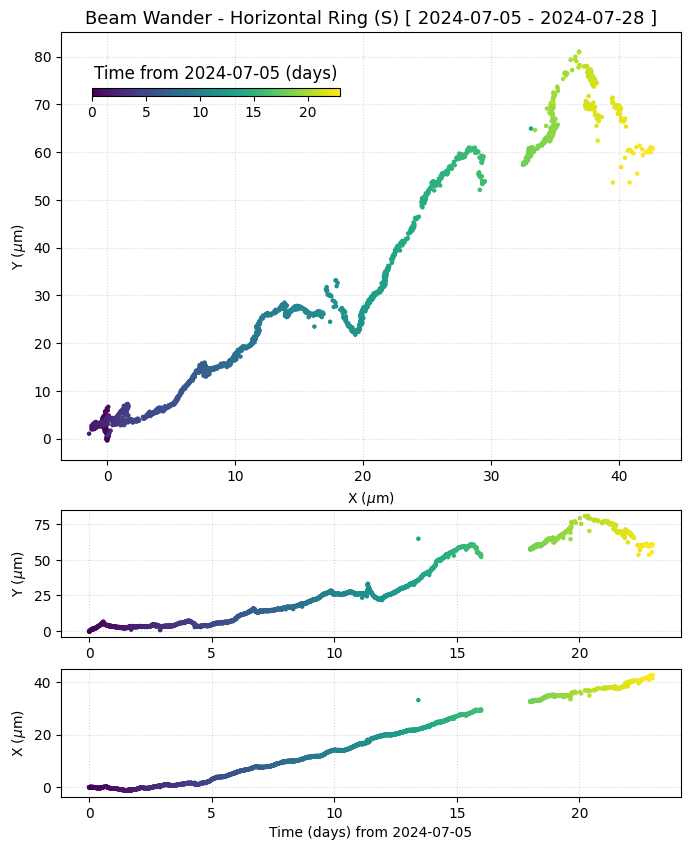

In [15]:
def __makeplot_beam_wander(df0):

    import matplotlib.pyplot as plt
    from matplotlib.gridspec import GridSpec

    time_scaling = 1/86400

    Ncol, Nrow = 2, 6

    font = 12

    fig = plt.figure(figsize=(8, 12))

    gs1 = GridSpec(Nrow, Ncol, figure=fig, hspace=0.7)
    gs2 = GridSpec(Nrow, Ncol, figure=fig)

    ax1 = fig.add_subplot(gs1[0:3, :])

    ax2 = fig.add_subplot(gs2[3, :])
    ax3 = fig.add_subplot(gs2[4, :])

    plt.subplots_adjust(hspace=0.25)

    # ax1.scatter(df0.x_idx, df0.y_idx, c=df0.time_sec*time_scaling, s=5, zorder=2)
    # cb = ax1.scatter(df0.x, df0.y, c=df0.time_sec*time_scaling, s=5, zorder=2)
    cb = ax1.scatter(df0.x_um_rel, df0.y_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)

    # ax2.scatter(df0.time_sec*time_scaling, df0.y, c=df0.time_sec*time_scaling, s=5, zorder=2)
    # ax3.scatter(df0.time_sec*time_scaling, df0.x, c=df0.time_sec*time_scaling, s=5, zorder=2)
    ax2.scatter(df0.time_sec*time_scaling, df0.y_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)
    ax3.scatter(df0.time_sec*time_scaling, df0.x_um_rel, c=df0.time_sec*time_scaling, s=5, zorder=2)

    ax1.set_ylabel("Y ($\mu$m)")
    ax1.set_xlabel("X ($\mu$m)")

    ax2.set_ylabel("Y ($\mu$m)")
    # ax2.set_xlabel(f"Time (days) from {str(df.time_utc.iloc[0])[:10]}")

    ax3.set_ylabel("X ($\mu$m)")
    ax3.set_xlabel(f"Time (days) from {str(df.time_utc.iloc[0])[:10]}")

    for ax in [ax1, ax2, ax3]:
        ax.grid(ls=":", alpha=0.5, zorder=0)

    # x1, x2 = 3.44, 3.52
    # y1, y2 = 1.62, 1.66
    x1, x2 = -10, 120
    y1, y2 = -10, 70
    # ax1.set_xlim(x1, x2)
    # ax1.set_ylim(y1, y2)
    # ax2.set_ylim(y1, y2)
    # ax3.set_ylim(x1, x2)

    # add title
    ax1.set_title(f"Beam Wander - Horizontal Ring (S) [ {df0.time_utc.iloc[0].date} - {df0.time_utc.iloc[-1].date} ]", fontsize=font+1)

    # add colorbar
    cax1 = ax1.inset_axes([0.05, 0.85, 0.4, 0.02])
    cb5 = plt.colorbar(cb, ax=ax1, cax=cax1, orientation="horizontal")
    cb5.set_label(f"Time from {df0.time_utc.iloc[0].date} (days)", fontsize=font, labelpad=-40)


    plt.show();
    return fig

fig = __makeplot_beam_wander(df)

fig.savefig(config['path_to_figures']+f"BeamWander_RZ_IDS{config['camera']}_{config['date1']}_{config['date2']}.png", format="png", dpi=150, bbox_inches='tight')


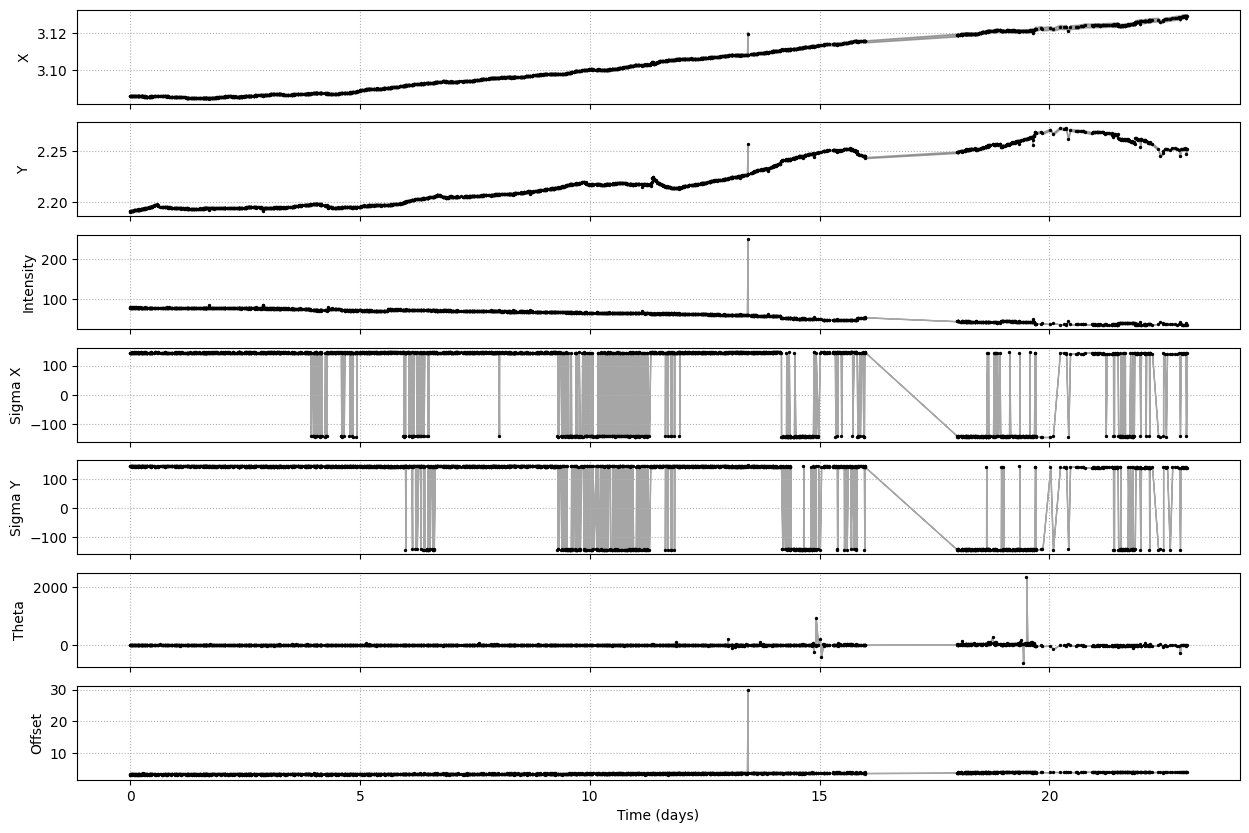

In [16]:
def __makeplot():

    Nrow, Ncol = 7, 1

    font = 12
    size = 2
    tscale = 1/86400

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 10), sharex=True)

    ax[0].fill_between(df.time_sec*tscale, df.x-df.x_var, df.x+df.x_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[0].scatter(df.time_sec*tscale, df.x, s=size, zorder=2, color="k")
    # ax[0].set_ylim(3.42, 3.75)
    ax[0].set_ylabel("X")

    ax[1].fill_between(df.time_sec*tscale, df.y-df.y_var, df.y+df.y_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[1].scatter(df.time_sec*tscale, df.y, s=size, zorder=2, color="k")
    # ax[1].set_ylim(1.58, 1.69)
    ax[1].set_ylabel("Y")

    ax[2].fill_between(df.time_sec*tscale, df.amp-df.amp_var, df.amp+df.amp_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[2].scatter(df.time_sec*tscale, df.amp, s=size, zorder=2, color="k")
    # ax[2].set_ylim(110, 130)
    ax[2].set_ylabel("Intensity")

    ax[3].fill_between(df.time_sec*tscale, df.x_sig-df.x_sig_var, df.x_sig+df.x_sig_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[3].scatter(df.time_sec*tscale, df.x_sig, s=size, zorder=2, color="k")
    # ax[3].set_ylim(511, 518)
    ax[3].set_ylabel("Sigma X")

    ax[4].fill_between(df.time_sec*tscale, df.y_sig-df.y_sig_var, df.y_sig+df.y_sig_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[4].scatter(df.time_sec*tscale, df.y_sig, s=size, zorder=2, color="k")
    # ax[4].set_ylim(480, 495)
    ax[4].set_ylabel("Sigma Y")

    ax[5].fill_between(df.time_sec*tscale, df.theta-df.theta_var, df.theta+df.theta_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[5].scatter(df.time_sec*tscale, df.theta, s=size, zorder=2, color="k")
    # ax[5].set_ylim(0.4, 0.55)
    ax[5].set_ylabel("Theta")

    ax[6].fill_between(df.time_sec*tscale, df.offset-df.offset_var, df.offset+df.offset_var,
                       color="grey", alpha=0.7, interpolate=False
                      )
    ax[6].scatter(df.time_sec*tscale, df.offset, s=size, zorder=2, color="k")
    # ax[6].set_ylim(8.5, 11.5)
    ax[6].set_ylabel("Offset")

    ax[6].set_xlabel("Time (days)")

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        # ax[_n].legend(loc=1)

    plt.show();
    return fig

fig = __makeplot();

fig.savefig(config['path_to_figures']+f"BeamWander_RZ_IDS{config['camera']}_parameters_{config['date1']}_{config['date2']}.png", format="png", dpi=150, bbox_inches='tight')


In [17]:
df

,time,x,y,x_idx,y_idx,amp,x_sig,y_sig,theta,offset,...,y_sig_var,x_sig_var,theta_var,offset_var,time_sec,time_utc,y_idx_nan,x_idx_nan,x_um_rel,y_um_rel
0,2024-07-06T00:06:07.000000Z,3.086336,2.191372,3.0846,2.1889,79.514462,143.322224,146.601233,1.129144,3.143048,...,0.000495,0.000471,0.000019,0.000005,0.0,2024-07-05T23:06:07.000000Z,2.1889,3.0846,-0.049307,-0.047835
1,2024-07-06T00:09:06.000000Z,3.086346,2.191197,3.0846,2.1889,80.065201,143.309493,146.613291,1.135710,2.821676,...,0.000494,0.000470,0.000019,0.000005,179.0,2024-07-05T23:09:06.000000Z,2.1889,3.0846,-0.040190,-0.222172
2,2024-07-06T00:16:06.000000Z,3.086396,2.191011,3.0846,2.1889,79.961752,143.319800,146.597207,1.127090,3.052104,...,0.000494,0.000470,0.000019,0.000005,599.0,2024-07-05T23:16:06.000000Z,2.1889,3.0846,0.010129,-0.408398
3,2024-07-06T00:24:07.000000Z,3.086399,2.191255,3.0846,2.1889,79.867625,143.313319,146.593971,1.130869,3.021727,...,0.000495,0.000471,0.000019,0.000005,1080.0,2024-07-05T23:24:07.000000Z,2.1889,3.0846,0.013508,-0.164391
4,2024-07-06T00:28:06.000000Z,3.086392,2.191413,3.0846,2.1889,79.791108,143.316160,146.593447,1.126336,3.249793,...,0.000494,0.000471,0.000019,0.000005,1319.0,2024-07-05T23:28:06.000000Z,2.1889,3.0846,0.006483,-0.006426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2024-07-07T23:08:06.000000Z,3.085789,2.194446,3.0846,2.1942,78.086765,143.297144,146.576048,1.133539,3.123171,...,0.000489,0.000466,0.000019,0.000005,169319.0,2024-07-07T22:08:06.000000Z,2.1942,3.0846,-0.596485,3.026109
284,2024-07-07T23:10:06.000000Z,3.085732,2.194675,3.0846,2.1942,78.217543,143.298273,146.586647,1.126479,3.301118,...,0.000489,0.000466,0.000019,0.000005,169439.0,2024-07-07T22:10:06.000000Z,2.1942,3.0846,-0.653652,3.255169
285,2024-07-07T23:18:07.000000Z,3.085695,2.194103,3.0846,2.1942,79.277841,146.621372,143.288480,-0.431550,3.128662,...,0.000458,0.000482,0.000018,0.000005,169920.0,2024-07-07T22:18:07.000000Z,2.1942,3.0846,-0.690603,2.683947
286,2024-07-07T23:30:07.000000Z,3.085678,2.194403,3.0846,2.1942,78.858227,143.275278,146.593521,1.135709,3.216767,...,0.000486,0.000463,0.000019,0.000005,170640.0,2024-07-07T22:30:07.000000Z,2.1942,3.0846,-0.707917,2.983119
